In [1]:
from pycesam import *
from pycesam.gui import *
import astropy.units as u
from astropy.constants import R_jup, R_sun, mu0, M_sun, G
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget
from ipywidgets import interact

In [2]:
mdl = CModel('1MJ_R')
mdl_plot = CModelGUI('1MJ_R')

Reading 1MJ_R.don...[Done]
Reading 1MJ_R.run...[Done]
Reading 1MJ_R.frun...[Done]


Reading *1MJ_R*.osc files:   0%|          | 0/131 [00:00<?, ?it/s]

Reading 1MJ_R.HRnew...[Done]
Reading 1MJ_R.don...[Done]
Reading 1MJ_R.run...[Done]
Reading 1MJ_R.frun...[Done]


/home/localuser/Desktop/M2/Gas_Dynamics/Project/cesam2k20/python3/pycesam/__init__.py:1226: RuntimeWarning: divide by zero encountered in log10
  self.FeH  = np.log10(self.z/x) - np.log10(zsx_sol)
/home/localuser/Desktop/M2/Gas_Dynamics/Project/cesam2k20/python3/pycesam/__init__.py:1226: RuntimeWarning: invalid value encountered in log10
  self.FeH  = np.log10(self.z/x) - np.log10(zsx_sol)


Reading *1MJ_R*.osc files:   0%|          | 0/131 [00:00<?, ?it/s]

Reading 1MJ_R.HRnew...[Done]


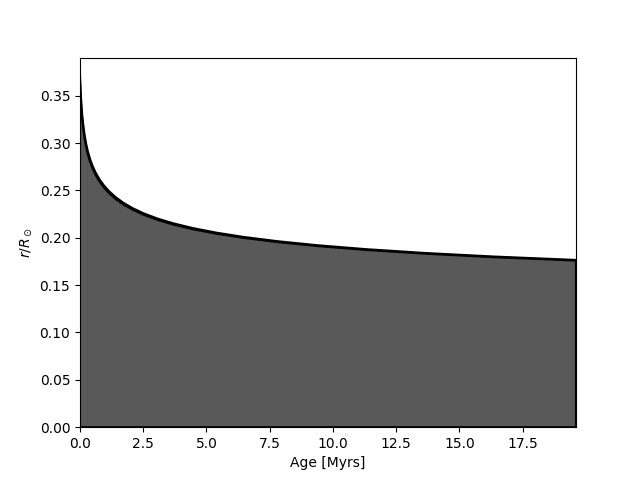

In [3]:
mdl_plot.plot_cz(r_or_m='r')
plt.show()

In [4]:
end = len(mdl.glob)-1
Omega = mdl.params.w_rot*1e3
R_tot = mdl.var[end][0][0]/1e2
print(f"total radius of planet = {R_tot/(R_jup.value)} Rjup")
print(f"total mass of planet = {mdl.params.mtot} Msun")
print(f"total angular velocity of planet = {Omega/1e3} km/s")

total radius of planet = 1.1282561394168578 Rjup
total mass of planet = 0.001 Msun
total angular velocity of planet = 5.0 km/s


In [5]:
print(R_tot)

80661287.91918999


In [6]:
Omega_array = mdl.var[end][15] # rad/s

In [7]:
len(Omega_array)

433

/home/localuser/Desktop/M2/Gas_Dynamics/Project/cesam2k20/python3/pycesam/__init__.py:3979: RuntimeWarning: invalid value encountered in divide
  self.Frad = krad*te*grad/hp


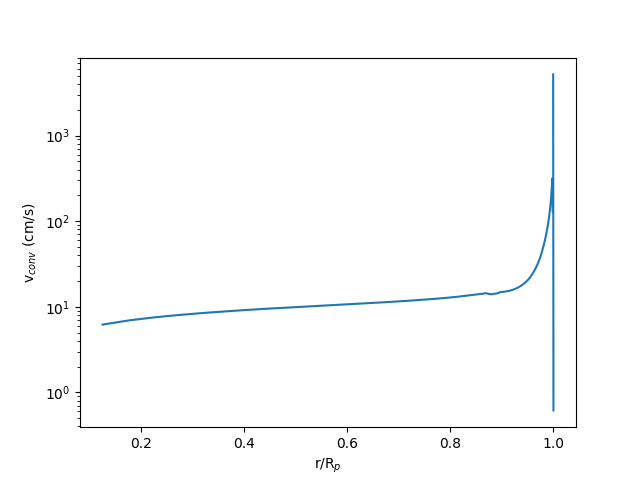

In [8]:
mdl.calc_vconv('osc', i=end)

r = ((mdl.var[end][0])/(R_tot*1e2))
  
plt.figure()
plt.plot(r, mdl.vconv)
    
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'v$_{conv}$ (cm/s)')
plt.yscale('log')
plt.show()

In [9]:
mask = np.where(~np.isnan(mdl.vconv))

In [10]:
@interact(i=(0, len(mdl.var)-1, 1)) 
def plot_Ro_over_time(i=end):
    
    R_tot = mdl.var[i][0][0]
    r = ((mdl.var[i][0])/(R_tot))
    mdl.calc_vconv('osc', i=i)
    Ro = mdl.vconv/(mdl.lmix*mdl.var[i][15]) #vconv/lmix * Omega
        
        
    age = mdl.glob[i][10]
    plt.figure()
    #print(len(r),len(Ro),len(mdl.vconv),len(mdl.lmix))
    plt.plot(r, Ro)
    plt.plot(r, 0.12*np.ones(len(Ro)), label=r'critical R$_o$')
    plt.xlabel(r'r/R$_p$')
    plt.ylabel(r'Ro')
    plt.yscale('log')
    plt.title(f'At t = {age/1e3} Gyr')
    plt.show()

interactive(children=(IntSlider(value=130, description='i', max=130), Output()), _dom_classes=('widget-interac…

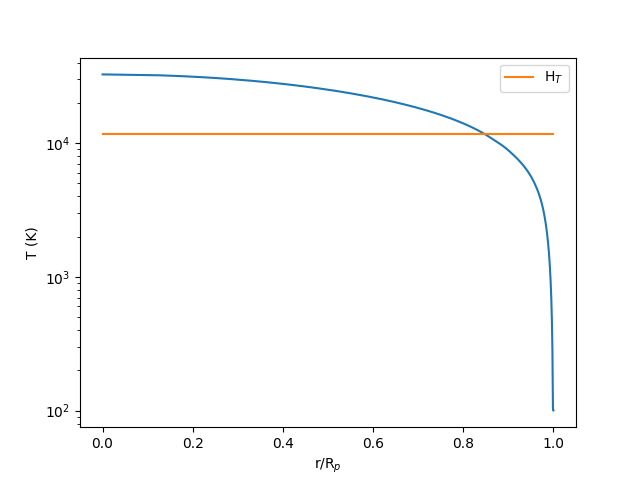

In [11]:
T = mdl.var[end][2]
index = np.where(np.abs(T - T[-1]/2.78) < 100)
plt.figure()
plt.plot(r, T)
plt.plot(r, (T[-1]/2.78)*np.ones(len(r)), label=r'H$_T$')
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'T (K)')
plt.yscale('log')
plt.legend()
plt.show()

H_T_obs = r[index]*R_tot*1e2

In [12]:
@interact(i=(0, len(mdl.var), 1)) 
def plot_pressure_over_time(i=end):
    R_tot = mdl.var[i][0][0]
    r = ((mdl.var[i][0])/(R_tot))
    age = mdl.glob[i][10]
    plt.figure()
    plt.plot(r, mdl.var[i][3]*1e-12)
    plt.xlabel(r'r/R$_p$')
    plt.ylabel(r'P (Mbar)')
    plt.yscale('log')
    plt.title(f'At t = {age/1e3} Gyr')
    plt.show()

interactive(children=(IntSlider(value=130, description='i', max=131), Output()), _dom_classes=('widget-interac…

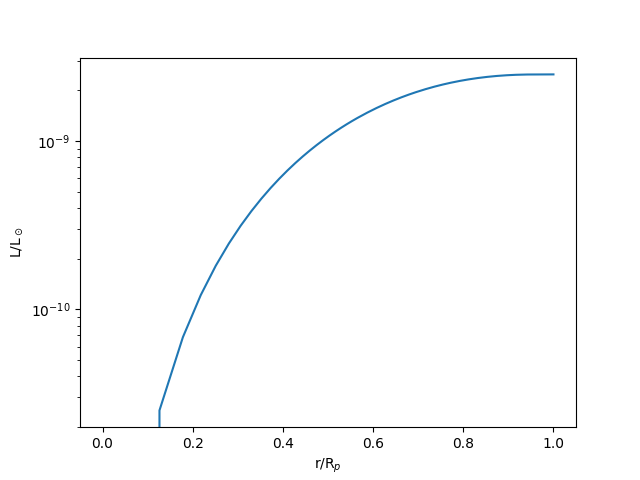

In [13]:
L = mdl.var[end][6]
L_sun = mdl.glob[end][16]

plt.figure()
plt.plot(r, L/L_sun)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'L/L$_\odot$')
plt.yscale('log')
plt.show()

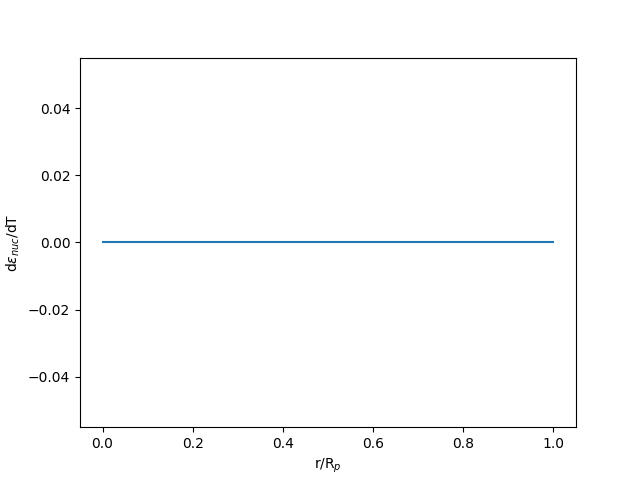

In [14]:
denuc_dT = mdl.var[end][18]

plt.figure()
plt.plot(r, denuc_dT)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'd$\epsilon_{nuc}$/dT')
#plt.yscale('log')
plt.show()

In [15]:
print(mdl.var[0][2])

[  736.14737325   736.15941818   736.17776656   736.20595144
   736.24953952   736.31728092   736.42286353   736.5875379
   736.84394465   737.24150826   737.85369366   738.78714614
   740.19208761   742.27213996   745.28990028   749.56235615
   755.43857244   763.25288902   773.25233141   785.50753381
   799.82849549   815.71233607   832.34387484   848.65348839
   863.42005235   875.39870622   885.74233678   896.37443942
   907.26860056   918.39795298   929.73550295   941.25442531
   952.92832431   964.73145949   976.63893741   988.62687069
  1000.67250688  1012.71126598  1024.63965706  1036.42047966
  1048.03980656  1059.49148299  1070.7699822   1081.86783037
  1092.77555175  1103.48505704  1113.99209471  1124.29569259
  1134.3977781   1144.30321565  1154.01955637  1163.55610174
  1172.92173994  1182.1225681   1191.16222052  1200.04296913
  1208.76708295  1217.33859042  1225.76368323  1234.0503955
  1242.20823901  1250.24760553  1258.17883714  1266.01184079
  1273.75601316  1281.4203

In [16]:
@interact(i=(0, len(mdl.var)-1, 1)) 
def plot_Rm_over_time(i=end):

    c = 3*10**10
    eta = c**2/(4*np.pi*10**7*mdl.var[i][2]**(3/2)) #eta = c^2/(4*pi*10^7*T^3/2)
    mdl.calc_vconv('osc', i=i)
    Rm = mdl.vconv*mdl.lmix/eta
    R_tot = mdl.var[i][0][0]
    r = ((mdl.var[i][0])/(R_tot))
    
    
    age = mdl.glob[i][10]
    plt.figure()
    #print(len(r),len(Rm),len(eta))
    plt.plot(r, Rm)
    plt.plot(r, 50*np.ones(len(Rm)), label=r'critical R$_m$')
    plt.xlabel(r'r/R$_p$')
    plt.ylabel(r'R$_m$')
    plt.yscale('log')
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=130, description='i', max=130), Output()), _dom_classes=('widget-interac…

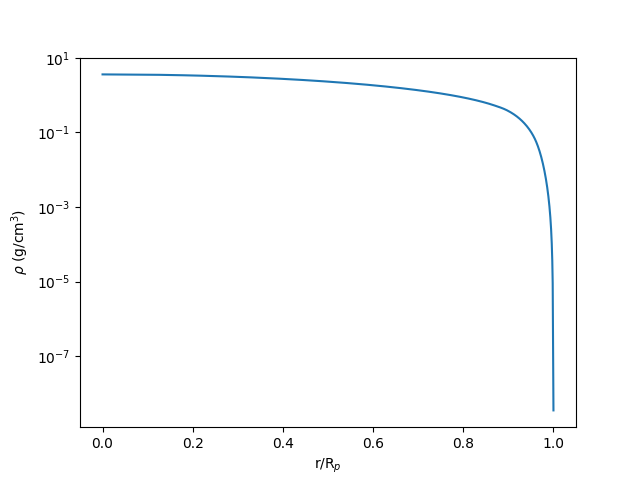

In [17]:
rho = mdl.var[end][4]

plt.figure()
plt.plot(r, rho)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'$\rho$ (g/cm$^3$)')
plt.yscale('log')
plt.show()

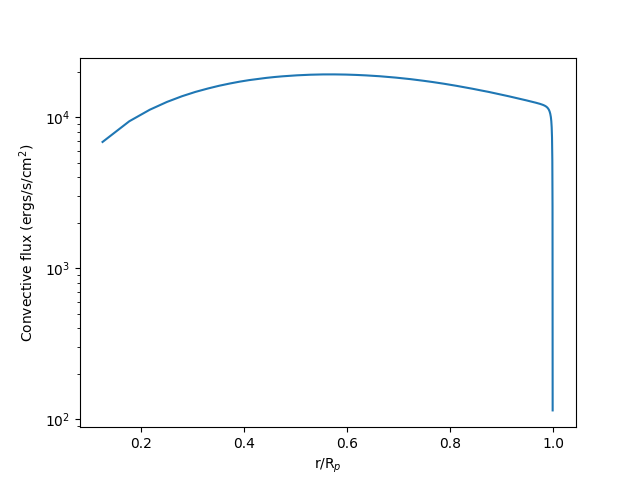

In [18]:
plt.figure()
plt.plot(r, mdl.Fconv)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'Convective flux (ergs/s/cm$^2$)')
plt.yscale('log')
plt.show()

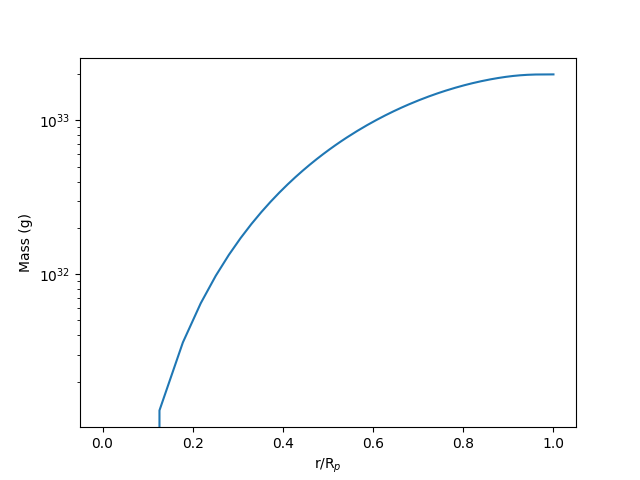

In [19]:
plt.figure()
plt.plot(r, mdl.var[end][1]*M_sun.value*1e3)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'Mass (g)')
plt.yscale('log')
plt.show()

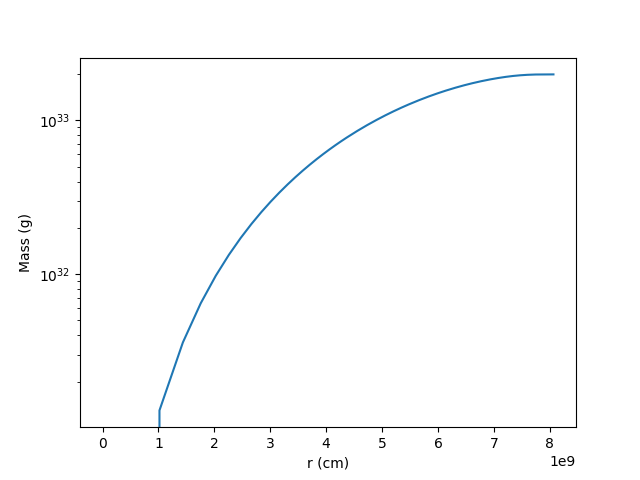

In [20]:
plt.figure()
plt.plot(mdl.var[end][0], mdl.var[end][1]*M_sun.value*1e3)
plt.xlabel(r'r (cm)')
plt.ylabel(r'Mass (g)')
plt.yscale('log')
plt.show()

In [21]:
print(R_tot)

80661287.91918999


In [22]:
R_tot = mdl.var[end][0][0]/1e2
print(R_tot)

80661287.91918999


In [31]:
c = 0.68
f_ohm = 1
rho_avg = np.mean(rho[mask])
#print(rho_avg)
qc_0 = mdl.Fconv[mask][-1]
#print(qc_0)
dr = mdl.var[end][0][mask]
#print(dr)
mask_2 = np.where(mdl.Fconv[mask] > 0)
#print(mask_2)
V = (4/3)*np.pi*(R_tot*1e2)**3
print(H_T_obs[0])
dF = (mdl.Fconv[mask][mask_2]*mdl.lmix[mask][mask_2]/(qc_0*H_T_obs))**(2/3)*(rho[mask][mask_2]/rho_avg)**(1/3)*4*np.pi*dr[mask_2]**2
#print(dF)
print(len(dF))
mask_3 = np.where(dF > 0)
F = np.trapezoid(dF[mask_3][::-1], dr[mask_2][mask_3][::-1]) / V 
#F = np.trapz(dF[mask_3][::-1], dr[mask_2][mask_3][::-1]) / V #trapz ou trapezoid dépend de la version de numpy
print(F)


6830554166.960001
385
1.0209294307082586


In [24]:
print(qc_0)

6848.120506444323


In [25]:
B = np.sqrt(c*F*rho_avg**(1/3)*qc_0**(2/3))
print(f"Generated magnetic field strength = {B} Gauss")

Generated magnetic field strength = 13.15331682524204 Gauss


In [26]:
B_time = []
@interact(i=(0, len(mdl.var)-1, 1)) 
def plot_Elsasser_over_time(i=end):

    
    T = mdl.var[i][2]
    sigma = 10**7*T**(3/2)
    c_light = 3*10**10
    eta = c_light**2/(4*np.pi*sigma)
    rho = mdl.var[i][4]
    mdl.calc_vconv('osc', i=i)
    Rm = mdl.vconv*mdl.lmix/eta
    mask = np.where(~np.isnan(mdl.vconv))
    rho_avg = np.mean(rho[mask])
    qc_0 = mdl.Fconv[mask][-1]
    dr = mdl.var[i][0][mask]
    mask_2 = np.where(mdl.Fconv[mask] > 0)
    R_tot = mdl.var[i][0][0]
    r = ((mdl.var[i][0])/(R_tot))
    index = np.where(np.abs(T - T[-1]/2.78) < 100)
    H_T_obs = (r[index]*R_tot)[0]
    #print(f"H_T_obs =  {H_T_obs}")

    
    V = (4/3)*np.pi*(R_tot)**3
    dF = (mdl.Fconv[mask][mask_2]*mdl.lmix[mask][mask_2]/(qc_0*H_T_obs))**(2/3)*(rho[mask][mask_2]/rho_avg)**(1/3)*4*np.pi*dr[mask_2]**2
    mask_3 = np.where(dF > 0)
    F = np.trapezoid(dF[mask_3][::-1], dr[mask_2][mask_3][::-1]) / V 
    #F= np.trapz(dF[mask_3][::-1], dr[mask_2][mask_3][::-1]) / V
    print(f"F = {F}")


    
    
    B = np.sqrt(c*F*rho_avg**(1/3)*qc_0**(2/3))
    B_time.append(B)
    Omega = mdl.var[i][15]
    Elsasser = B**2/(2*eta*rho*Omega)
    Elsasser_prime = Elsasser*mdl.lmix/(0.6*np.sqrt(Rm))
    
    print(f"Generated B = {B} Gauss")
    
    plt.figure()
    plt.plot(r, Elsasser, label='$\Lambda$')
    #plt.plot(r, Elsasser_prime, label='$\Lambda$ prime')
    plt.plot(r, 1*np.ones(len(Elsasser)), label=r'$\Lambda$ = 1')
    plt.xlabel(r'r/R$_p$')
    plt.ylabel(r'$\Lambda$ (Elsasser nb)')
    plt.yscale('log')
    plt.legend()
    plt.show()


interactive(children=(IntSlider(value=130, description='i', max=130), Output()), _dom_classes=('widget-interac…

/tmp/ipykernel_71752/2095151061.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


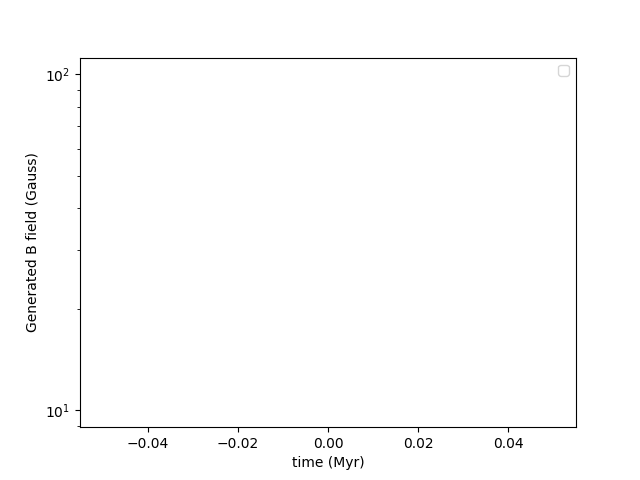

In [33]:
plt.figure()
time = np.array(mdl.glob)[:len(B_time),10]
plt.plot(time, B_time)
plt.xlabel('time (Myr)')
plt.ylabel('Generated B field (Gauss)')
plt.yscale('log')
plt.legend()
plt.show()

In [27]:
B_time

[np.float64(13.153316825242037)]